* get mosaiks geometry (CRS missing) 
* write functions to get geometry of mosaiks
* join mosaiks and poverty

To deal with :
- geometry mosaiks is missing crs, I added one basic one, but it may not be correct


When training a model, do the de-mean approach (or at least try both and compare).

In [1]:
import pickle
from pathlib import Path
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

import child_poverty_iraq.data.load_data as ld
import child_poverty_iraq.utils.constants as c

In [2]:
mosaiks_adm1 = ld.get_mosaiks_adm1()
pov_adm1 = ld.get_poverty_adm1()

Mosaiks shape: (2849, 4001)
The file '../data/external/geoBoundariesCGAZ_ADM1.topojson' exists.
Geometry shape: (3291, 9)
(2849, 4010)
Number of obs with missing geometry: 1
(2848, 4010)
Poverty shape: (1110, 13)


100%|██████████| 176/176 [03:09<00:00,  1.08s/it]


Geometry shape: (2554, 5)
Poverty + geometry shape: (1110, 18)


In [3]:
merged = ld.merge_mosaiks_pov_adm1(pov_adm1, mosaiks_adm1, threshold=0.51)

(6813, 4030)
(1033, 4034)


The file '../data/interim/IRQ_mosaiks_ADM2.csv' exists.
(101, 4002)
(101, 2)
(101, 4003)


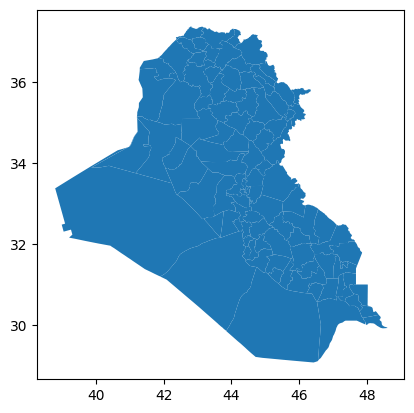

In [4]:
irq_adm2 = ld.adm2_for_country(cc='IRQ')

# Mosaiks

In [3]:
mosaiks_adm1 = ld.get_mosaiks_adm1()

mosaiks_adm1

Mosaiks shape: (2849, 4001)
The file '../data/external/geoBoundariesCGAZ_ADM1.topojson' exists.
Geometry shape: (3291, 9)
(2849, 4010)
(2848, 4010)


,ADM1_shape,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_3999,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,ADM0_shapeID,ADMHIERARCHY,geometry
0,AFG-ADM1-3_0_0-B1,0.221817,0.595860,0.027869,0.822692,0.362865,0.315121,0.036010,0.042699,0.777227,...,0.013120,NaN,Ghor,AF-GHO,AFG-ADM1-3_0_0-B1,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B1|AFG-ADM0-3_0_0-B1,"POLYGON ((65.63424 33.67222, 65.62959 33.67345..."
1,AFG-ADM1-3_0_0-B10,0.146467,0.415417,0.042324,0.320048,0.247005,0.393481,0.085266,0.104986,0.266778,...,0.045413,NaN,Khost,AF-KHO,AFG-ADM1-3_0_0-B10,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B10|AFG-ADM0-3_0_0-B1,"POLYGON ((70.01106 33.72774, 70.01443 33.72788..."
2,AFG-ADM1-3_0_0-B11,0.348311,0.618846,0.172008,0.356765,0.487272,0.708066,0.121886,0.296796,0.268160,...,0.125906,NaN,Kabul,AF-KAB,AFG-ADM1-3_0_0-B11,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B11|AFG-ADM0-3_0_0-B1,"POLYGON ((69.48667 34.16097, 69.48417 34.15833..."
3,AFG-ADM1-3_0_0-B12,0.215285,0.590580,0.028435,0.806572,0.356798,0.315907,0.035490,0.045013,0.761920,...,0.013987,NaN,Faryab,AF-FYB,AFG-ADM1-3_0_0-B12,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B12|AFG-ADM0-3_0_0-B1,"POLYGON ((64.75744 36.86590, 64.76838 36.88097..."
4,AFG-ADM1-3_0_0-B13,0.187058,0.426874,0.063148,0.307363,0.279305,0.427705,0.079931,0.147547,0.258425,...,0.059637,NaN,Parwan,AF-PAR,AFG-ADM1-3_0_0-B13,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B13|AFG-ADM0-3_0_0-B1,"POLYGON ((68.18912 35.01766, 68.19040 35.02355..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,ZWE-ADM1-3_0_0-B5,0.175371,0.591224,0.024962,0.673062,0.335149,0.387064,0.094716,0.072956,0.606102,...,0.039570,NaN,Masvingo,ZW-MV,ZWE-ADM1-3_0_0-B5,ZWE,ADM1,ZWE-ADM0-3_0_0-B1,ZWE-ADM1-3_0_0-B5|ZWE-ADM0-3_0_0-B1,"POLYGON ((31.11332 -22.33520, 31.08904 -22.305..."
2845,ZWE-ADM1-3_0_0-B6,0.164068,0.579983,0.021568,0.724915,0.322026,0.343411,0.078075,0.058912,0.659953,...,0.030911,NaN,Midlands,ZW-MI,ZWE-ADM1-3_0_0-B6,ZWE,ADM1,ZWE-ADM0-3_0_0-B1,ZWE-ADM1-3_0_0-B6|ZWE-ADM0-3_0_0-B1,"POLYGON ((29.23685 -19.48233, 29.21886 -19.475..."
2846,ZWE-ADM1-3_0_0-B7,0.262918,0.766908,0.051963,0.849476,0.465430,0.520253,0.120114,0.105517,0.768614,...,0.068055,NaN,Bulawayo,ZW-BU,ZWE-ADM1-3_0_0-B7,ZWE,ADM1,ZWE-ADM0-3_0_0-B1,ZWE-ADM1-3_0_0-B7|ZWE-ADM0-3_0_0-B1,"POLYGON ((28.49650 -20.23536, 28.51285 -20.201..."
2847,ZWE-ADM1-3_0_0-B8,0.147854,0.550030,0.016323,0.718596,0.295976,0.305369,0.068226,0.047348,0.657353,...,0.022649,NaN,Mashonaland West,ZW-MC,ZWE-ADM1-3_0_0-B8,ZWE,ADM1,ZWE-ADM0-3_0_0-B1,ZWE-ADM1-3_0_0-B8|ZWE-ADM0-3_0_0-B1,"POLYGON ((28.24844 -17.40026, 28.23949 -17.384..."


In [2]:
# mosaiks_adm1 = ld.get_mosaiks_adm1()
# print(mosaiks_adm1.shape)
# mosaiks_adm1.head(2)

(2849, 4001)


,ADM1_shape,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_3990,X_3991,X_3992,X_3993,X_3994,X_3995,X_3996,X_3997,X_3998,X_3999
0,AFG-ADM1-3_0_0-B1,0.221817,0.595860,0.027869,0.822692,0.362865,0.315121,0.036010,0.042699,0.777227,...,0.076052,0.027038,0.117758,0.079705,0.076191,0.589121,0.547973,0.176470,0.468623,0.013120
1,AFG-ADM1-3_0_0-B10,0.146467,0.415417,0.042324,0.320048,0.247005,0.393481,0.085266,0.104986,0.266778,...,0.176959,0.079718,0.313601,0.206565,0.142533,0.690189,1.129587,0.354073,0.446426,0.045413


In [3]:
# geom_mos_adm1 = ld.get_mosaiks_geom_adm1()
# print(geom_mos_adm1.shape)
# geom_mos_adm1.head(2)

The file '../data/external/geoBoundariesCGAZ_ADM1.topojson' exists.
(3291, 9)


,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,ADM0_shapeID,ADMHIERARCHY,geometry
0,NaN,Isle of Youth,CU-99,CUB-ADM1-3_0_0-B1,CUB,ADM1,CUB-ADM0-3_0_0-B1,CUB-ADM1-3_0_0-B1|CUB-ADM0-3_0_0-B1,"MULTIPOLYGON (((-81.40194 21.68767, -81.40168 ..."
1,NaN,Havana,CU-03,CUB-ADM1-3_0_0-B2,CUB,ADM1,CUB-ADM0-3_0_0-B1,CUB-ADM1-3_0_0-B2|CUB-ADM0-3_0_0-B1,"POLYGON ((-82.09676 23.17242, -82.09666 23.171..."


* Understand which is the CRS of file

In [6]:
# # Set the CRS
# geom_mos_adm1.crs =  'EPSG:4326'
# geom_mos_adm1.crs

In [4]:
mosaiks_adm1 = pd.merge(mosaiks_adm1, geom_mos_adm1, how='left', left_on='ADM1_shape', right_on='shapeID')
print(mosaiks_adm1.shape)
mosaiks_adm1.head(2)

(2849, 4010)


,ADM1_shape,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_3999,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,ADM0_shapeID,ADMHIERARCHY,geometry
0,AFG-ADM1-3_0_0-B1,0.221817,0.595860,0.027869,0.822692,0.362865,0.315121,0.036010,0.042699,0.777227,...,0.013120,NaN,Ghor,AF-GHO,AFG-ADM1-3_0_0-B1,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B1|AFG-ADM0-3_0_0-B1,"POLYGON ((65.63424 33.67222, 65.62959 33.67345..."
1,AFG-ADM1-3_0_0-B10,0.146467,0.415417,0.042324,0.320048,0.247005,0.393481,0.085266,0.104986,0.266778,...,0.045413,NaN,Khost,AF-KHO,AFG-ADM1-3_0_0-B10,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B10|AFG-ADM0-3_0_0-B1,"POLYGON ((70.01106 33.72774, 70.01443 33.72788..."


In [5]:
# Check missing values in merging
mosaiks_adm1[mosaiks_adm1['geometry'].isnull()]
# SLV --- El salvador

,ADM1_shape,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_3999,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,ADM0_shapeID,ADMHIERARCHY,geometry
2151,SLV-ADM1-3_0_0-B1,0.137027,0.213253,0.226659,0.023241,0.140888,0.291179,0.360282,0.887646,0.010079,...,0.165848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [6]:
# Drop rows with missing geometry
mosaiks_adm1 = mosaiks_adm1.dropna(subset=['geometry'])
print(mosaiks_adm1.shape)

(2848, 4010)


In [7]:
# Transform in geo dataframe
mosaiks_adm1 = gpd.GeoDataFrame(mosaiks_adm1, geometry='geometry')

# Poverty

In [4]:
pov_adm1 = ld.get_poverty_adm1()

Poverty shape: (1110, 13)


100%|██████████| 176/176 [00:27<00:00,  6.33it/s]

Geometry shape: (2554, 5)
Poverty + geometry shape: (1110, 18)


In [8]:
pov_adm1 = ld.get_poverty_adm1()
print(pov_adm1.shape)
pov_adm1.head(2)

(1110, 13)


,countrycode,survey,survey_round,year_chpov,deprived_sev,deprived_mod,sumpoor_sev,sumpoor_mod,nat_deprived_sev,nat_deprived_mod,geocode,popnational0017,pop0017
0,AFG,DHS,71.0,2015.0,94.106728,99.041710,1.767125,2.363397,82.904877,93.396584,AFG_ADM1_272,19895792.0,795903.94
1,AFG,DHS,71.0,2015.0,90.175560,96.397911,1.727377,2.420170,82.904877,93.396584,AFG_ADM1_273,19895792.0,440900.22


In [9]:
geom_pov_adm1 = ld.get_poverty_geom_adm1()
print(geom_pov_adm1.shape)
geom_pov_adm1.head(2)

100%|██████████| 176/176 [00:24<00:00,  7.17it/s]

(2554, 5)


,fid,REF_AREA,SUBREGION_NAME,SUBREGION,geometry
0,1468,RUS,Adygey,RUS_ADM1_1_1,"MULTIPOLYGON (((40.38721 44.67212, 40.36063 44..."
1,1469,RUS,Altay,RUS_ADM1_2_1,"MULTIPOLYGON (((82.74661 50.94901, 82.71341 50..."


Ho rimosso CAN, USA e MLT perchè avevano dei tmp.crs diversi così mi sono semplificata il lavoro

In [10]:
pov_adm1 = pd.merge(pov_adm1, geom_pov_adm1, how='left', left_on='geocode', right_on ='SUBREGION')
pov_adm1 = gpd.GeoDataFrame(pov_adm1, geometry='geometry')

print(pov_adm1.shape)
pov_adm1.head(2)

(1110, 18)


,countrycode,survey,survey_round,year_chpov,deprived_sev,deprived_mod,sumpoor_sev,sumpoor_mod,nat_deprived_sev,nat_deprived_mod,geocode,popnational0017,pop0017,fid,REF_AREA,SUBREGION_NAME,SUBREGION,geometry
0,AFG,DHS,71.0,2015.0,94.106728,99.041710,1.767125,2.363397,82.904877,93.396584,AFG_ADM1_272,19895792.0,795903.94,2111.0,AFG,Badakhshan,AFG_ADM1_272,"MULTIPOLYGON (((71.00345 38.47583, 71.03115 38..."
1,AFG,DHS,71.0,2015.0,90.175560,96.397911,1.727377,2.420170,82.904877,93.396584,AFG_ADM1_273,19895792.0,440900.22,2112.0,AFG,Badghis,AFG_ADM1_273,"MULTIPOLYGON (((63.91477 35.86124, 63.89734 35..."


There is a problem with "COL" and "DOM". Their SUBREGION's codes has this format 'COL_SVY1_2015397001' instead of 'COL_ADM1_934' this one.

In [11]:
pov_adm1[pov_adm1['countrycode']=='COL'].head(2)

,countrycode,survey,survey_round,year_chpov,deprived_sev,deprived_mod,sumpoor_sev,sumpoor_mod,nat_deprived_sev,nat_deprived_mod,geocode,popnational0017,pop0017,fid,REF_AREA,SUBREGION_NAME,SUBREGION,geometry
219,COL,DHS,71.0,2015.0,28.465214,52.167397,0.392309,0.804881,19.797577,37.977715,COL_SVY1_2015397001,NaN,NaN,NaN,NaN,NaN,NaN,None
220,COL,DHS,71.0,2015.0,17.525406,35.023830,0.219870,0.482063,19.797577,37.977715,COL_SVY1_2015397002,NaN,NaN,NaN,NaN,NaN,NaN,None


# Plots

In [39]:
# Get country shapes
geom_adm0 = ld.get_mosaiks_geom_adm0()


The file '../data/external/geoBoundariesCGAZ_ADM0.topojson' exists.


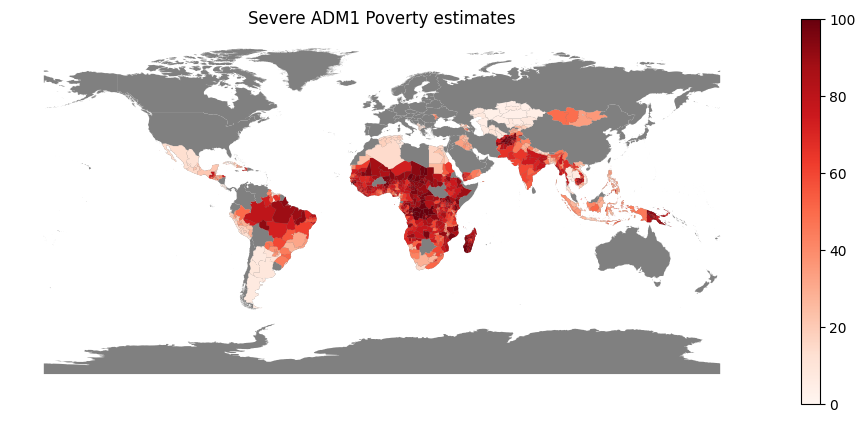

In [18]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')

# Plot countries with national poverty estimates
pov_adm1.plot(ax=ax, column='deprived_sev', cmap='Reds', legend=True, vmin=0, vmax=100)

plt.title('Severe ADM1 Poverty estimates')
plt.axis('off')
plt.show()


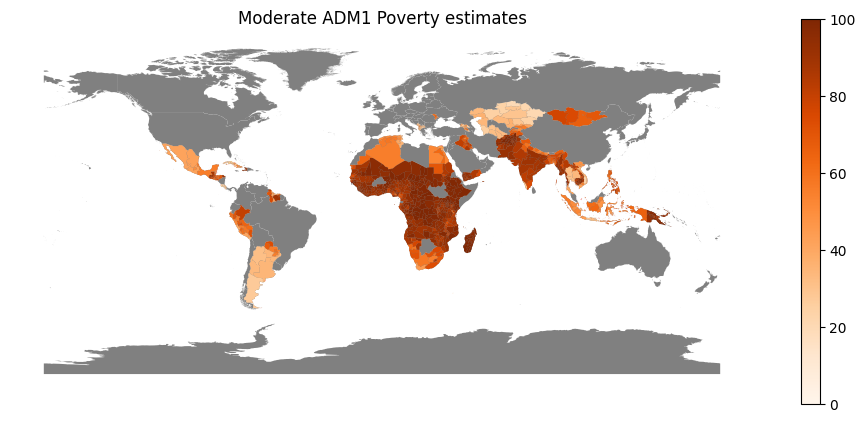

In [19]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')

# Plot countries with national poverty estimates
pov_adm1.plot(ax=ax, column='deprived_mod', cmap='Oranges', legend=True, vmin=0, vmax=100)

plt.title('Moderate ADM1 Poverty estimates')
plt.axis('off')
plt.show()


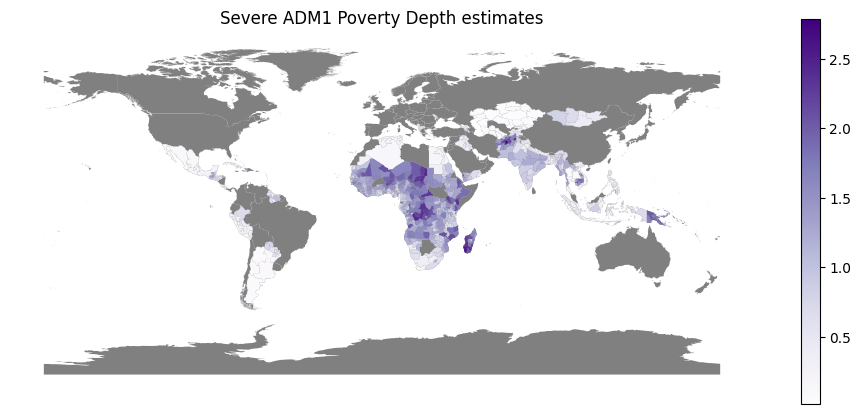

In [20]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')

# Plot countries with national poverty estimates
pov_adm1.plot(ax=ax, column='sumpoor_sev', cmap='Purples', legend=True)

plt.title('Severe ADM1 Poverty Depth estimates')
plt.axis('off')
plt.show()


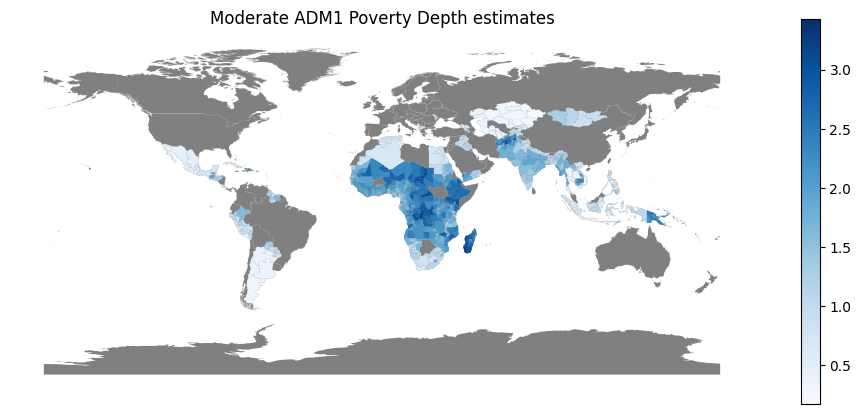

In [21]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')

# Plot countries with national poverty estimates
pov_adm1.plot(ax=ax, column='sumpoor_mod', cmap='Blues', legend=True)

plt.title('Moderate ADM1 Poverty Depth estimates')
plt.axis('off')
plt.show()


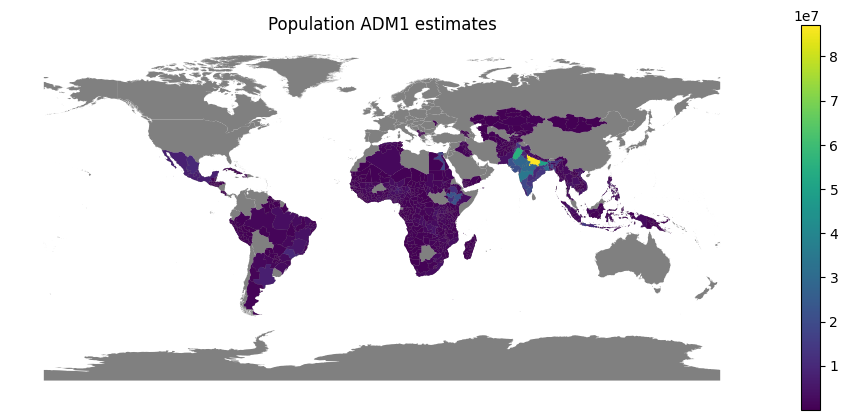

In [22]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')

# Plot countries with national poverty estimates
pov_adm1.plot(ax=ax, column='pop0017', cmap='viridis', legend=True)

plt.title('Population ADM1 estimates')
plt.axis('off')
plt.show()


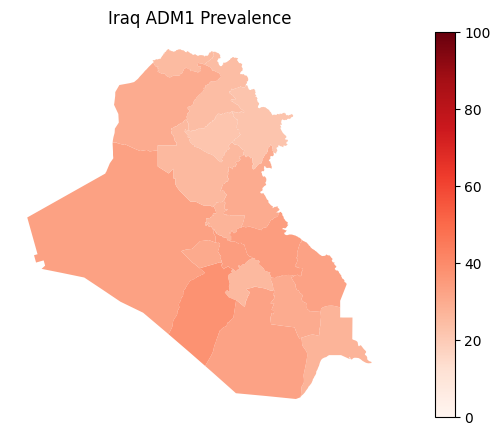

In [23]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot ADM2 prevalence estimate
pov_adm1[pov_adm1['countrycode']=='IRQ'].plot(ax=ax, column='deprived_sev', cmap='Reds', legend=True, vmin = 0, vmax = 100)

plt.title('Iraq ADM1 Prevalence')
plt.axis('off')
plt.show()


<Axes: >

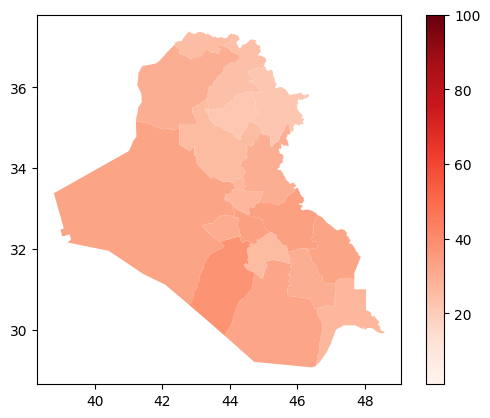

In [23]:
pov_adm1[pov_adm1['countrycode']=='IRQ'].plot(column='deprived_sev', cmap='Reds', legend=True, vmin=1, vmax=100)


<Axes: >

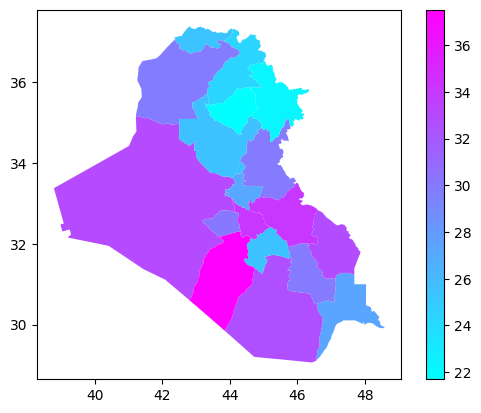

In [24]:
pov_adm1[pov_adm1['countrycode']=='IRQ'].plot(column='deprived_sev', cmap='cool', legend=True)


# Merge MOSAIKS and Poverty

In [8]:
def make_valid(x):
    if x.is_valid:
        return x
    else: 
        return x.buffer(0)


def get_area(x):
    try:
        return x.area
    except:
        return 0

In [9]:
def merge_mosaiks_pov_adm1(pov_adm1, mosaiks_adm1, threshold=0.51):
    # DROP MISSING GEOMETRY IN POV ADM1 (i.e. COL e DOM)
    pov_adm1.dropna(subset=['geometry'], inplace=True)

    # Check CRS
    assert pov_adm1.crs == mosaiks_adm1.crs

    # Valid geometry
    pov_adm1['geometry'] = pov_adm1.apply(lambda x: make_valid(x['geometry']), axis=1)
    mosaiks_adm1['geometry'] = mosaiks_adm1.apply(lambda x: make_valid(x['geometry']), axis=1)

    # Copy geometry
    mosaiks_adm1['geom_mos'] = mosaiks_adm1['geometry']
    pov_adm1['geom_pov'] = pov_adm1['geometry']

    # Merge dataframe
    tmp = gpd.sjoin(pov_adm1, mosaiks_adm1, how='left', predicate='intersects')
    print(tmp.shape)

    # Intersection between geometry
    tmp['geom_inter'] = tmp.apply(lambda x: x['geom_pov'].intersection(x['geom_mos']), axis=1)

    # Percentage of common areas
    tmp['area_inter'] = tmp.apply(lambda x: get_area(x['geom_inter']), axis=1)
    tmp['area_pov'] = tmp.apply(lambda x: get_area(x['geom_pov']), axis=1)
    tmp['perc_pov'] = tmp['area_inter'] / tmp['area_pov']

    # Keep only geometries above threshold
    merged = tmp[tmp['perc_pov']>threshold].copy()
    print(merged.shape)

    return merged

In [10]:
merged = merge_mosaiks_pov_adm1(pov_adm1, mosaiks_adm1, threshold=0.51)

(6813, 4030)
(1033, 4034)


,countrycode,survey,survey_round,year_chpov,deprived_sev,deprived_mod,sumpoor_sev,sumpoor_mod,nat_deprived_sev,nat_deprived_mod,...,shapeID,shapeGroup,shapeType,ADM0_shapeID,ADMHIERARCHY,geom_mos,geom_inter,area_inter,area_pov,perc_pov
0,AFG,DHS,71.0,2015.0,94.106728,99.041710,1.767125,2.363397,82.904877,93.396584,...,AFG-ADM1-3_0_0-B9,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B9|AFG-ADM0-3_0_0-B1,"POLYGON ((74.55442 37.03001, 74.55437 37.02998...","POLYGON ((71.00619 38.47449, 71.01189 38.47058...",4.386041,4.398014,0.997278
1,AFG,DHS,71.0,2015.0,90.175560,96.397911,1.727377,2.420170,82.904877,93.396584,...,AFG-ADM1-3_0_0-B29,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B29|AFG-ADM0-3_0_0-B1,"POLYGON ((62.73221 35.25011, 62.73420 35.24998...","POLYGON ((63.91001 35.85435, 63.90558 35.84941...",2.034122,2.038407,0.997898
2,AFG,DHS,71.0,2015.0,94.944252,98.171120,1.703144,2.367717,82.904877,93.396584,...,AFG-ADM1-3_0_0-B5,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B5|AFG-ADM0-3_0_0-B1,"POLYGON ((68.17067 36.54441, 68.17497 36.54468...","POLYGON ((68.36697 36.54847, 68.37213 36.54763...",1.771835,1.776157,0.997567
3,AFG,DHS,71.0,2015.0,80.262993,93.717552,1.465177,2.185355,82.904877,93.396584,...,AFG-ADM1-3_0_0-B18,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B18|AFG-ADM0-3_0_0-B1,"POLYGON ((66.25603 37.35126, 66.25905 37.34759...","POLYGON ((67.00734 37.37575, 67.01075 37.37363...",1.685668,1.689935,0.997475
4,AFG,DHS,71.0,2015.0,95.308777,99.550652,2.118480,2.701436,82.904877,93.396584,...,AFG-ADM1-3_0_0-B23,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B23|AFG-ADM0-3_0_0-B1,"POLYGON ((66.53348 34.32981, 66.53537 34.33314...","POLYGON ((67.81996 35.47567, 67.82009 35.47551...",1.758146,1.762952,0.997274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,ZWE,MICS,6.0,2019.0,61.998684,91.569748,0.904804,1.841625,50.139332,85.116516,...,ZWE-ADM1-3_0_0-B5,ZWE,ADM1,ZWE-ADM0-3_0_0-B1,ZWE-ADM1-3_0_0-B5|ZWE-ADM0-3_0_0-B1,"POLYGON ((31.11332 -22.33520, 31.08904 -22.305...","POLYGON ((31.18984 -19.23541, 31.19258 -19.239...",4.884698,4.899106,0.997059
1106,ZWE,MICS,6.0,2019.0,59.481888,88.386612,0.897813,1.775577,50.139332,85.116516,...,ZWE-ADM1-3_0_0-B2,ZWE,ADM1,ZWE-ADM0-3_0_0-B1,ZWE-ADM1-3_0_0-B2|ZWE-ADM0-3_0_0-B1,"POLYGON ((31.01433 -22.32153, 31.01305 -22.321...","POLYGON ((29.24587 -19.49913, 29.25650 -19.509...",4.691941,4.719994,0.994057
1107,ZWE,MICS,6.0,2019.0,53.404057,84.321747,0.811699,1.730201,50.139332,85.116516,...,ZWE-ADM1-3_0_0-B6,ZWE,ADM1,ZWE-ADM0-3_0_0-B1,ZWE-ADM1-3_0_0-B6|ZWE-ADM0-3_0_0-B1,"POLYGON ((29.23685 -19.48233, 29.21886 -19.475...","POLYGON ((28.93826 -17.16233, 28.95438 -17.178...",4.218623,4.231113,0.997048
1108,ZWE,MICS,6.0,2019.0,73.967873,93.400856,1.059943,1.941651,50.139332,85.116516,...,ZWE-ADM1-3_0_0-B1,ZWE,ADM1,ZWE-ADM0-3_0_0-B1,ZWE-ADM1-3_0_0-B1|ZWE-ADM0-3_0_0-B1,"POLYGON ((26.62883 -19.87866, 26.61636 -19.875...","POLYGON ((28.03274 -17.01468, 28.03216 -17.015...",6.440471,6.473789,0.994853


In [12]:
# DROP MISSING GEOMETRY IN POV ADM1 (i.e. COL e DOM)
pov_adm1.dropna(subset=['geometry'], inplace=True)

In [13]:
pov_adm1[pov_adm1['geometry'].isnull()]

,countrycode,survey,survey_round,year_chpov,deprived_sev,deprived_mod,sumpoor_sev,sumpoor_mod,nat_deprived_sev,nat_deprived_mod,geocode,popnational0017,pop0017,fid,REF_AREA,SUBREGION_NAME,SUBREGION,geometry


In [14]:
pov_adm1[pov_adm1['countrycode']=='IRQ'].shape

(18, 18)

In [15]:
mosaiks_adm1[mosaiks_adm1['shapeGroup']=='IRQ'].shape

(19, 4010)

I cannot use the adm1 name because they are very different in pov_adm1 and mosaiks_adm1

In [16]:
pov_adm1[pov_adm1['countrycode']=='IRQ']['SUBREGION_NAME']

451           Anbar
452          Basrah
453        Muthanna
454       Qadissiya
455           Najaf
456           Erbil
457          Kirkuk
458           Babil
459         Baghdad
460         Thi-Qar
461           Dahuk
462          Diyala
463         Kerbala
464          Missan
465          Ninewa
466    Salah al-Din
467    Sulaymaniyah
468          Wassit
Name: SUBREGION_NAME, dtype: object

In [17]:
mosaiks_adm1[mosaiks_adm1['shapeGroup']=='IRQ']['shapeName']

1158           Dohuk
1159    Al-Qadisiyah
1160           Babil
1161           Basra
1162         Dhi Qar
1163         Karbala
1164          Maysan
1165        Muthanna
1166           Najaf
1167           Wasit
1168         Halabja
1169           Erbil
1170          Kirkuk
1171         Nineveh
1172    Sulaymaniyah
1173        Al Anbar
1174         Baghdad
1175          Diyala
1176         Saladin
Name: shapeName, dtype: object

Now I try to join them based on geometry. First I check their crs

In [18]:
pov_adm1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
assert pov_adm1.crs == mosaiks_adm1.crs

In [19]:
mosaiks_adm1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
def make_valid(x):
    if x.is_valid:
        return x
    else: 
        return x.buffer(0)


In [21]:
pov_adm1['geometry'] = pov_adm1.apply(lambda x: make_valid(x['geometry']), axis=1)
mosaiks_adm1['geometry'] = mosaiks_adm1.apply(lambda x: make_valid(x['geometry']), axis=1)

In [22]:
mosaiks_adm1['geom_mos'] = mosaiks_adm1['geometry']
pov_adm1['geom_pov'] = pov_adm1['geometry']

In [23]:
tmp = gpd.sjoin(pov_adm1, mosaiks_adm1, how='left', predicate='intersects')

In [24]:
print(tmp.shape)
tmp.head(2)

(6813, 4030)


,countrycode,survey,survey_round,year_chpov,deprived_sev,deprived_mod,sumpoor_sev,sumpoor_mod,nat_deprived_sev,nat_deprived_mod,...,X_3999,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,ADM0_shapeID,ADMHIERARCHY,geom_mos
0,AFG,DHS,71.0,2015.0,94.106728,99.04171,1.767125,2.363397,82.904877,93.396584,...,0.088208,NaN,Khyber Pakhtunkhwa,PK-KP,PAK-ADM1-3_0_0-B8,PAK,ADM1,PAK-ADM0-3_0_0-B1,PAK-ADM1-3_0_0-B8|PAK-ADM0-3_0_0-B1,"POLYGON ((72.88013 33.75440, 72.86372 33.76344..."
0,AFG,DHS,71.0,2015.0,94.106728,99.04171,1.767125,2.363397,82.904877,93.396584,...,0.114912,NaN,Nuristan,AF-NUR,AFG-ADM1-3_0_0-B25,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B25|AFG-ADM0-3_0_0-B1,"POLYGON ((71.19479 36.03901, 71.20266 36.03836..."


In [25]:
(tmp['geom_pov']!=tmp['geometry']).sum()

0

In [26]:
tmp['geom_inter'] = tmp.apply(lambda x: x['geom_pov'].intersection(x['geom_mos']), axis=1)


In [27]:
print(tmp[tmp['geom_pov'].isnull()].shape)
print(tmp[tmp['geom_mos'].isnull()].shape)

(0, 4031)
(3, 4031)


In [28]:
tmp[tmp['geom_inter'].isnull()]

,countrycode,survey,survey_round,year_chpov,deprived_sev,deprived_mod,sumpoor_sev,sumpoor_mod,nat_deprived_sev,nat_deprived_mod,...,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,ADM0_shapeID,ADMHIERARCHY,geom_mos,geom_inter
225,COM,DHS,61.0,2012.0,70.022491,91.104935,1.051220,1.871025,74.577454,89.315956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
226,COM,DHS,61.0,2012.0,82.171455,87.329742,1.065330,1.463835,74.577454,89.315956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
604,MDA,MICS,4.0,2012.0,4.392144,37.156345,0.049833,0.481423,33.806221,57.777725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None


In [29]:
def get_area(x):
    try:
        return x.area
    except:
        return 0

In [30]:
tmp['area_inter'] = tmp.apply(lambda x: get_area(x['geom_inter']), axis=1)

In [31]:
sum(tmp['area_inter']==0)

3

In [39]:
tmp['area_inter'].describe()

count    6813.000000
mean        0.737172
std         3.742311
min         0.000000
25%         0.000603
50%         0.003173
75%         0.036960
max       126.890280
Name: area_inter, dtype: float64

In [32]:
tmp['area_pov'] = tmp.apply(lambda x: get_area(x['geom_pov']), axis=1)

In [33]:
tmp['area_pov'].describe()

count    6813.000000
mean        7.230561
std        16.963934
min         0.001390
25%         0.683665
50%         2.246142
75%         6.473789
max       177.770777
Name: area_pov, dtype: float64

In [34]:
tmp['area_pov'] = tmp.apply(lambda x: get_area(x['geom_pov']), axis=1)
tmp['perc_pov'] = tmp['area_inter'] / tmp['area_pov']

THRESHOLD = 0.51

print(tmp[tmp['perc_pov']>THRESHOLD].shape[0])
print(tmp[tmp['perc_pov']>THRESHOLD]['SUBREGION'].nunique())

merged = tmp[tmp['perc_pov']>THRESHOLD].copy()
merged.shape

In [35]:
THRESHOLD = 0.51

In [36]:
tmp[tmp['perc_pov']>THRESHOLD]['perc_pov'].describe()

count    1033.000000
mean        0.957610
std         0.077527
min         0.510031
25%         0.960786
50%         0.982961
75%         0.993772
max         1.000000
Name: perc_pov, dtype: float64

In [37]:
print(tmp[tmp['perc_pov']>THRESHOLD].shape[0])
print(tmp[tmp['perc_pov']>THRESHOLD]['SUBREGION'].nunique())

1033
1033


In [38]:
merged = tmp[tmp['perc_pov']>THRESHOLD].copy()
merged.shape

(1033, 4034)

In [39]:
merged[merged['countrycode']=='IRQ'].shape

(18, 4034)

# De-mean

In [103]:
# merged.drop(columns=['geometry', 'geom_inter', 'geom_mos', 'geom_pov'])

In [104]:
# merged.to_csv('../data/processed/mosaiks_pov_merged.csv', index=False)

In [51]:
merged['deprived_sev_demean'] = merged['deprived_sev'] - merged['nat_deprived_sev']

<Axes: >

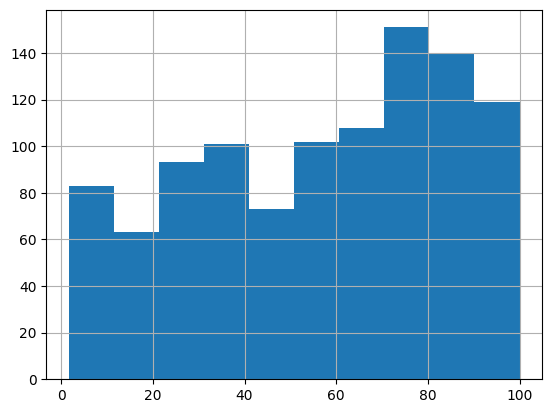

In [53]:
merged['deprived_sev'].hist()

<Axes: >

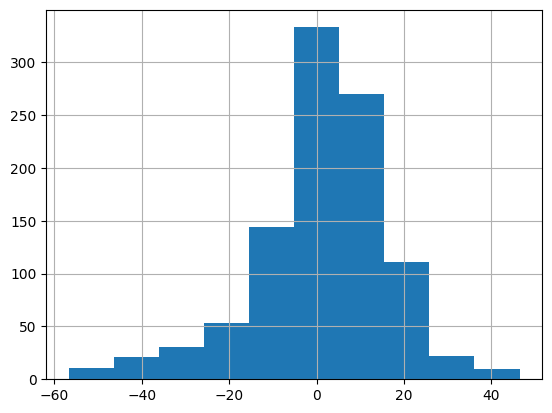

In [52]:
merged['deprived_sev_demean'].hist()

In [77]:
# merged_demean = merged[merged['deprived_sev_demean'].isnull()==False].copy()
# print(merged_demean.shape)

(1006, 4035)


In [91]:
merged.shape

(1033, 4035)

# Model

In [27]:
mosaiks_features = []
for i in range(4000):
    mosaiks_features.append(f'X_{i}')

In [28]:
X, y = merged[mosaiks_features], merged['deprived_sev']

In [7]:
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, cross_val_score
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
sum(y_train.isnull())

0

Brazil has only deprived_sev and none of the other dimensions.

In [ ]:
# # Standardize the features separately for training and test sets
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the Lasso regression model
lasso_model = Lasso(alpha=0.02)  # You can adjust the alpha value (regularization strength)
# lasso_model = LinearRegression()
# lasso_model = ElasticNet()
# lasso_model = SVR(C=1.0)
# lasso_model = SVR(C=0.01)

# Fit the model using K-fold cross-validation on the training data
kf = KFold(n_splits=5, shuffle=True, random_state=42)  

scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring = 'r2')
y_train_pred = cross_val_predict(lasso_model, X_train, y_train, cv=kf)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Fit the model to the entire training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = lasso_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Calculate mean squared error and R-squared on the training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


print(f"Training Mean Squared Error: {mse_train:.2f}")
print(f"Training R-squared: {r2_train:.2f}")
print()
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

/home/marina/miniconda3/envs/unicef_iraq/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.410e+04, tolerance: 4.989e+01
  model = cd_fast.enet_coordinate_descent(
/home/marina/miniconda3/envs/unicef_iraq/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.917e+04, tolerance: 5.106e+01
  model = cd_fast.enet_coordinate_descent(
/home/marina/miniconda3/envs/unicef_iraq/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

0.43 accuracy with a standard deviation of 0.03
Training Mean Squared Error: 437.11
Training R-squared: 0.43

Mean Squared Error: 368.20
R-squared: 0.53


/home/marina/miniconda3/envs/unicef_iraq/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.841e+04, tolerance: 6.363e+01
  model = cd_fast.enet_coordinate_descent(


In [32]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.43 accuracy with a standard deviation of 0.03


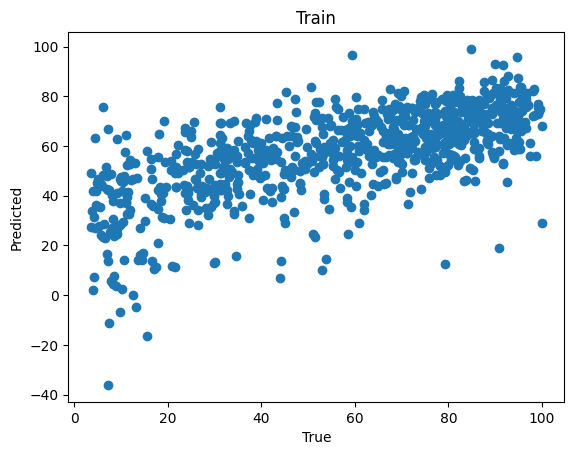

Text(0.5, 1.0, 'Test')

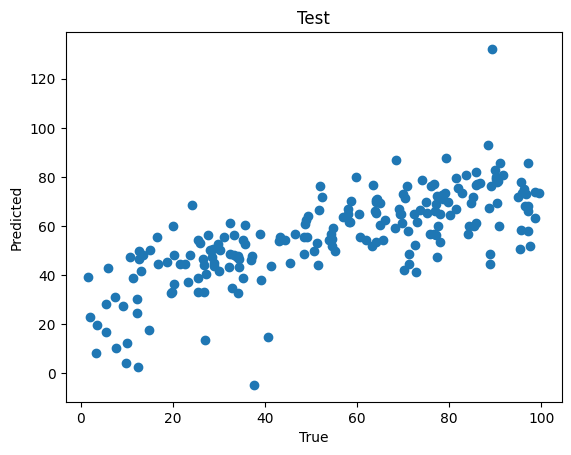

In [33]:
plt.scatter(y_train, y_train_pred)
plt.title('Train')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

plt.scatter(y_test, y_test_pred)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Test')

# Evaluate Results

In [34]:
merged['y_pred'] = lasso_model.predict(merged[mosaiks_features])

In [35]:
merged['dep_sev_error'] = merged['deprived_sev']-merged['y_pred']

(array([  6.,  37.,  96., 175., 213., 227., 186.,  78.,  12.,   3.]),
 array([-60.13334209, -47.89121303, -35.64908396, -23.40695489,
        -11.16482583,   1.07730324,  13.31943231,  25.56156137,
         37.80369044,  50.0458195 ,  62.28794857]),
 <BarContainer object of 10 artists>)

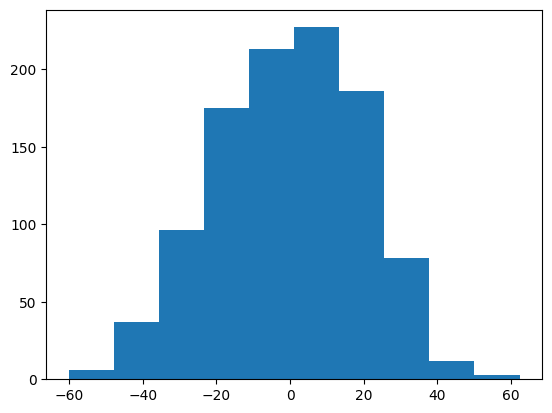

In [36]:
plt.hist(merged['dep_sev_error'])

In [37]:
type(merged)

geopandas.geodataframe.GeoDataFrame

In [38]:
print(merged['dep_sev_error'].describe())

# Compute max error in absolute value to for visualization purposes
val = abs(merged['dep_sev_error'].max())
dep_sev_err_min = -val
dep_sev_err_max = val


count    1033.000000
mean       -0.233153
std        19.765055
min       -60.133342
25%       -14.791328
50%         0.416096
75%        14.567509
max        62.287949
Name: dep_sev_error, dtype: float64


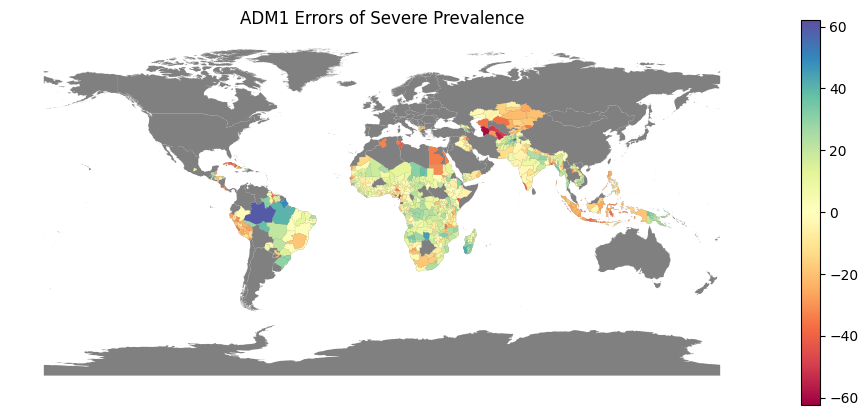

In [40]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')

# Plot countries with national poverty estimates
merged.plot(ax=ax, column='dep_sev_error', cmap='Spectral', legend=True, vmin = dep_sev_err_min, vmax = dep_sev_err_max)

plt.title('ADM1 Errors of Severe Prevalence')
plt.axis('off')
plt.show()


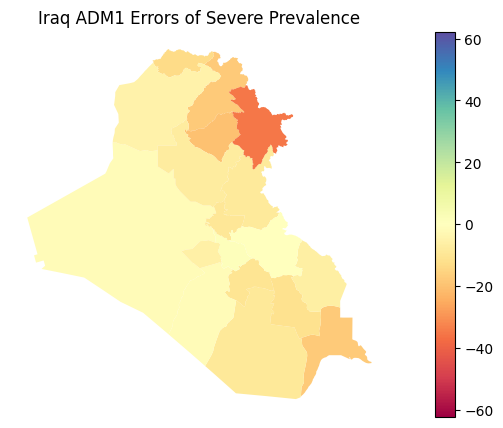

In [41]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot countries with ADM1 error poverty estimates
merged[merged['countrycode']=='IRQ'].plot(ax=ax, column='dep_sev_error', cmap='Spectral', legend=True, vmin = dep_sev_err_min, vmax = dep_sev_err_max)

plt.title('Iraq ADM1 Errors of Severe Prevalence')
plt.axis('off')
plt.show()


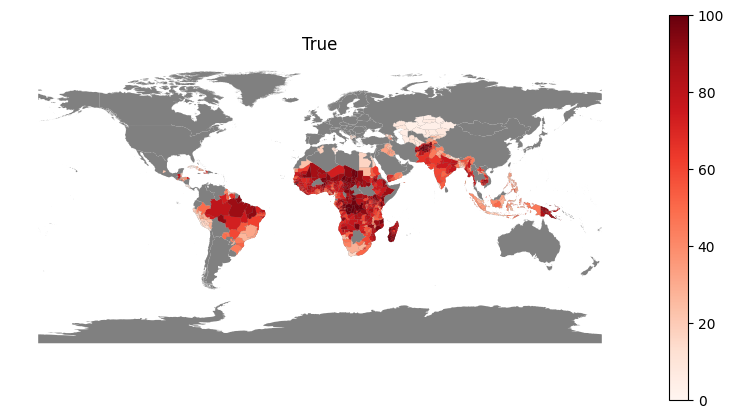

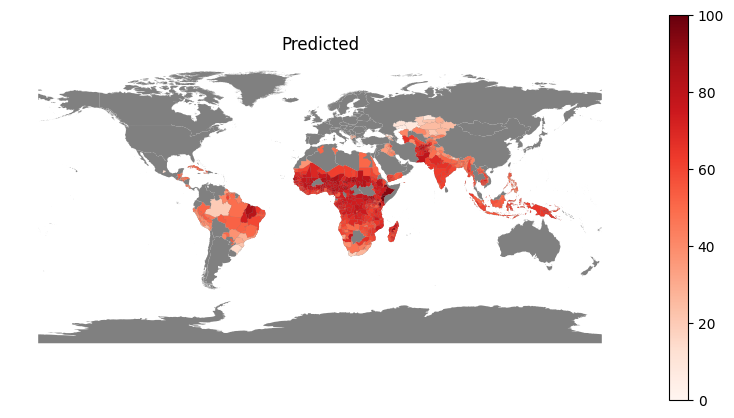

<Figure size 640x480 with 0 Axes>

In [45]:
## Predictions vs True

# True
fig, ax = plt.subplots(figsize=(10, 5))
geom_adm0.plot(ax = ax, color='gray')
merged.plot(ax = ax, column='deprived_sev', cmap='Reds', legend=True, vmin=0, vmax=100)
ax.set_title('True')
ax.axis('off')
plt.show()

# Predicted
fig, ax = plt.subplots(figsize=(10, 5))
geom_adm0.plot(ax = ax, color='gray')
merged.plot(ax= ax, column='y_pred', cmap='Reds', legend=True, vmin=0, vmax=100)
ax.set_title('Predicted')
ax.axis('off')
plt.show()


In [63]:
## Rich VS poor

In [71]:
threshold_rich = 50

rich = merged[merged['deprived_sev']<threshold_rich]
poor = merged[merged['deprived_sev']>=threshold_rich]


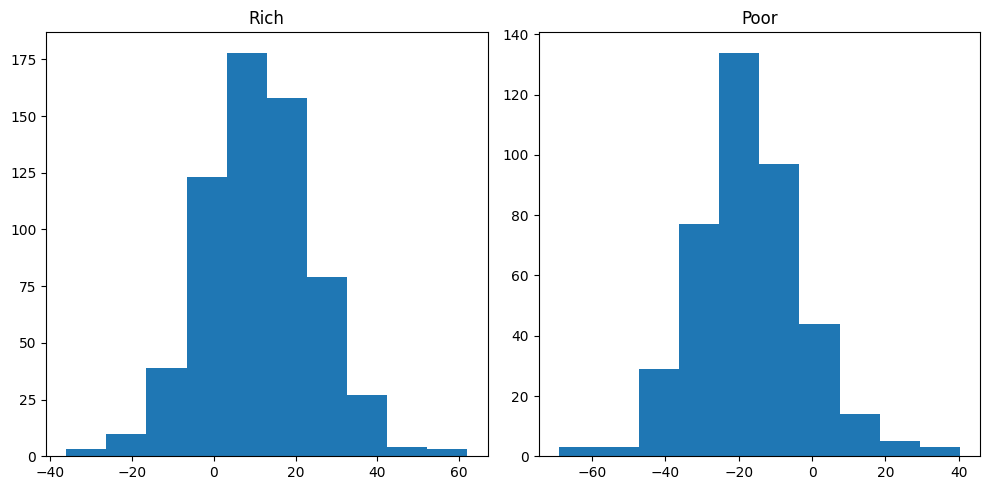

In [66]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left subplot
axes[0].hist(rich['dep_sev_error'])
axes[0].set_title('Rich')

# Plot the second image on the right subplot
axes[1].hist(poor['dep_sev_error'])
axes[1].set_title('Poor')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


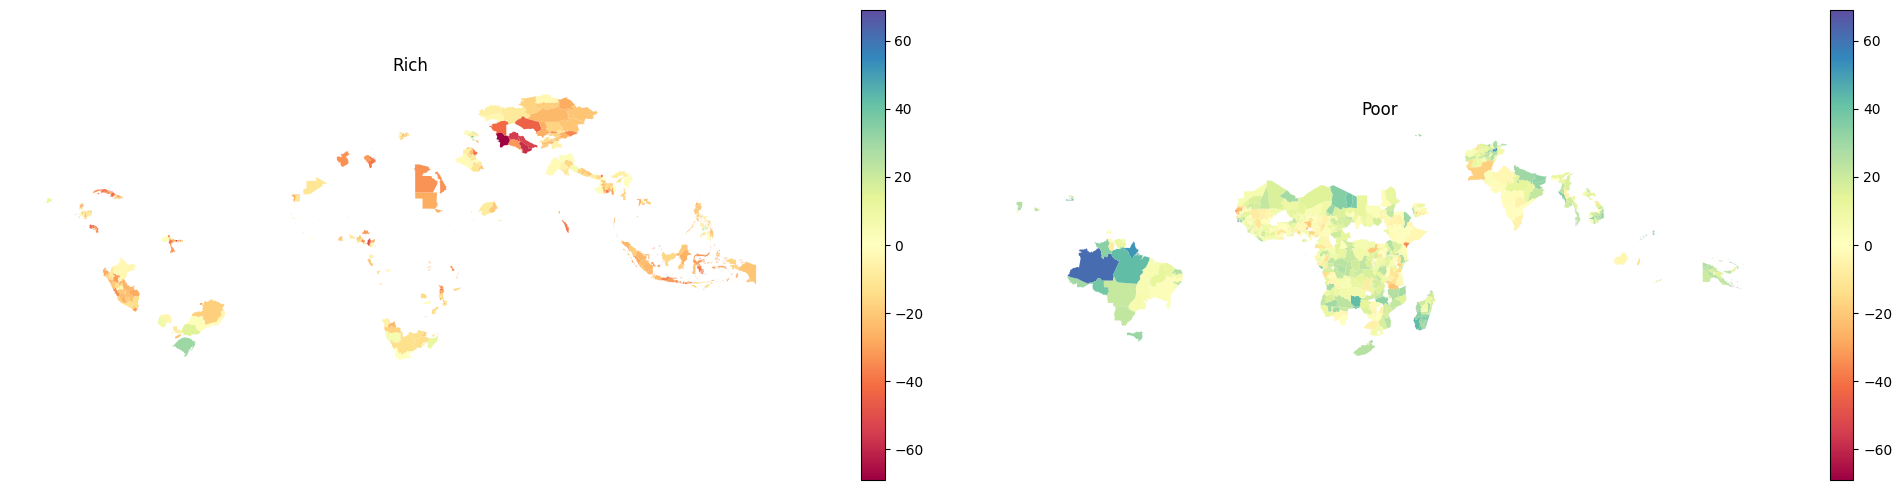

In [85]:
## Predictions vs True

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot the first image on the left subplot
# geom_adm0.plot(ax=axes[0], color='gray')
rich.plot(ax=axes[0], column='dep_sev_error', cmap='Spectral', legend=True, vmin = dep_sev_err_min, vmax = dep_sev_err_max)
axes[0].set_title('Rich')

# Plot the second image on the right subplot
# geom_adm0.plot(ax=axes[1], color='gray')
poor.plot(ax=axes[1], column='dep_sev_error', cmap='Spectral', legend=True, vmin = dep_sev_err_min, vmax = dep_sev_err_max)
axes[1].set_title('Poor')

# Remove ticks and labels
for ax in axes:
    ax.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [75]:
# cannot do the comparison for IRQ because they all fit in the rich parts

merged[merged['countrycode']=='IRQ']['deprived_sev']

451    32.944675
452    27.264933
453    32.636909
454    25.434816
455    37.521786
456    24.332230
457    21.695940
458    34.061211
459    27.032141
460    29.908176
461    25.353554
462    29.898977
463    30.142340
464    32.772488
465    29.809587
466    25.552618
467    22.255577
468    34.077614
Name: deprived_sev, dtype: float64

# IRQ ADM2

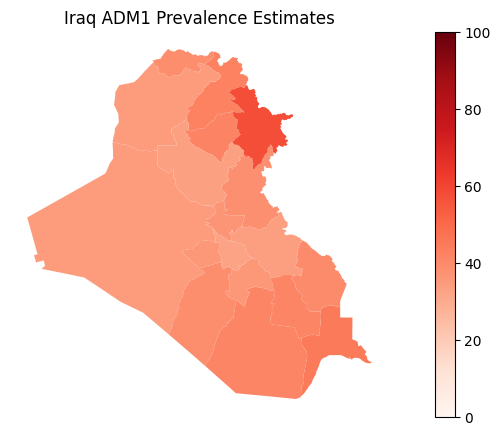

In [48]:
# Predicted
fig, ax = plt.subplots(figsize=(12, 5))

merged[merged['countrycode']=='IRQ'].plot(ax= ax, column='y_pred', cmap='Reds', legend=True, vmin=0, vmax=100)
plt.title('Iraq ADM1 Prevalence Estimates')
ax.axis('off')
plt.show()

In [46]:
irq_adm2['dep_sev_pred'] = lasso_model.predict(irq_adm2[mosaiks_features])

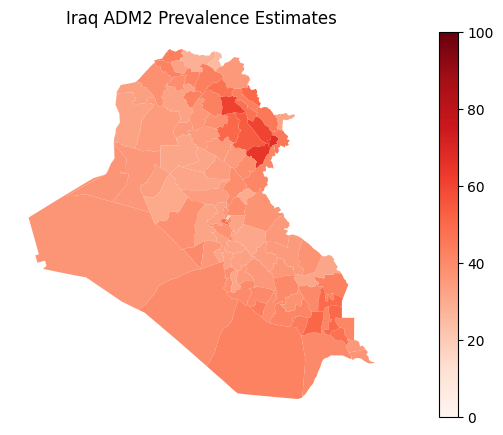

In [47]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot ADM2 prevalence estimate
irq_adm2.plot(ax=ax, column='dep_sev_pred', cmap='Reds', legend=True, vmin = 0, vmax = 100)

plt.title('Iraq ADM2 Prevalence Estimates')
plt.axis('off')
plt.show()


In [26]:
irq_adm2['dep_sev_pred'].describe()

count    101.000000
mean      40.864679
std        8.803691
min       27.850998
25%       35.505117
50%       38.370007
75%       43.451918
max       75.982315
Name: dep_sev_pred, dtype: float64

# Depth

In [61]:
tmp = merged.dropna(subset=['sumpoor_sev']).copy()
X, y = tmp[mosaiks_features], tmp['sumpoor_sev']

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
sum(y_train.isnull())

0

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the Lasso regression model
lasso_model = Lasso(alpha=0.02)  # You can adjust the alpha value (regularization strength)
# lasso_model = LinearRegression()
# lasso_model = ElasticNet()
# lasso_model = SVR(C=1.0)
# lasso_model = SVR(C=0.01)

# Fit the model using K-fold cross-validation on the training data
kf = KFold(n_splits=5, shuffle=True, random_state=42)  

scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring = 'r2')
y_train_pred = cross_val_predict(lasso_model, X_train, y_train, cv=kf)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Fit the model to the entire training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = lasso_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Calculate mean squared error and R-squared on the training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


print(f"Training Mean Squared Error: {mse_train:.2f}")
print(f"Training R-squared: {r2_train:.2f}")
print()
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

0.14 accuracy with a standard deviation of 0.04
Training Mean Squared Error: 0.31
Training R-squared: 0.14

Mean Squared Error: 0.34
R-squared: 0.09


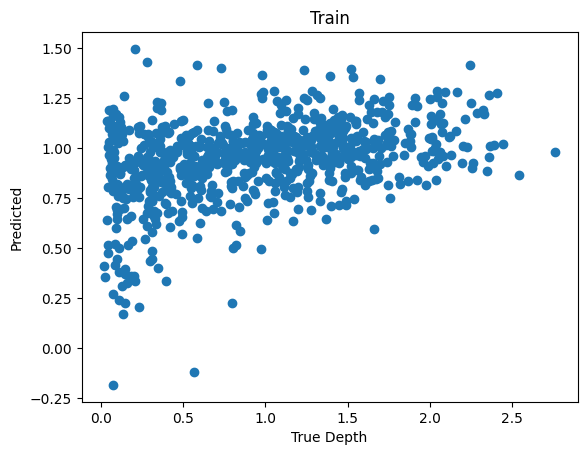

Text(0.5, 1.0, 'Test')

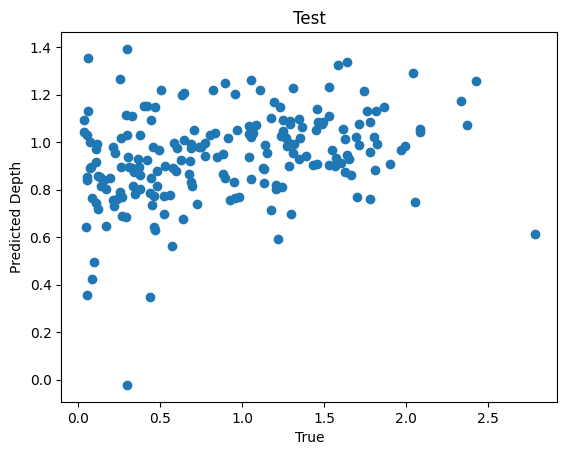

In [65]:
plt.scatter(y_train, y_train_pred)
plt.title('Train')
plt.xlabel('True Depth')
plt.ylabel('Predicted')
plt.show()

plt.scatter(y_test, y_test_pred)
plt.xlabel('True')
plt.ylabel('Predicted Depth')
plt.title('Test')

(array([ 29., 132., 214., 210., 203., 130.,  64.,  21.,   2.,   1.]),
 array([-1.29307368, -0.94620389, -0.5993341 , -0.25246431,  0.09440547,
         0.44127526,  0.78814505,  1.13501484,  1.48188463,  1.82875442,
         2.1756242 ]),
 <BarContainer object of 10 artists>)

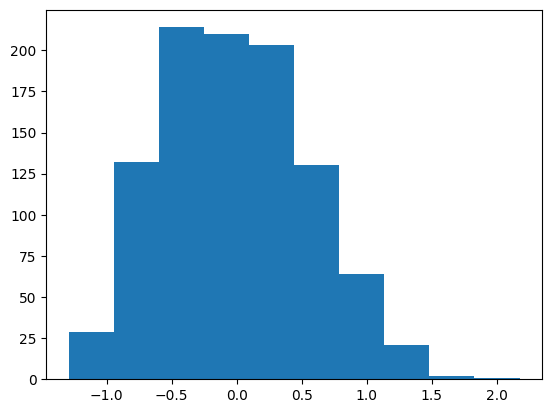

In [66]:
merged['depth_pred'] = lasso_model.predict(merged[mosaiks_features])
merged['depth_sev_error'] = merged['sumpoor_sev']-merged['depth_pred']
plt.hist(merged['depth_sev_error'])

In [67]:
depth_sev_err_max = max(abs(merged['depth_sev_error']))
depth_sev_err_max

2.1756242039796754

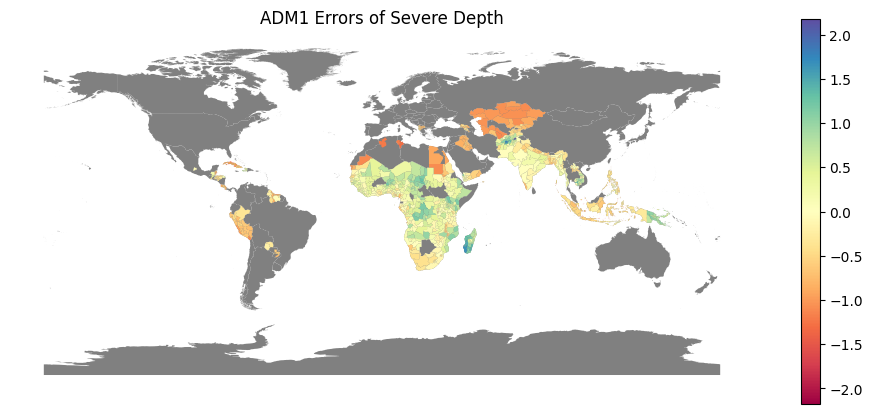

In [69]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')

# Plot countries with national poverty estimates
merged.plot(ax=ax, column='depth_sev_error', cmap='Spectral', legend=True, vmin = -depth_sev_err_max, vmax = depth_sev_err_max)

plt.title('ADM1 Errors of Severe Depth')
plt.axis('off')
plt.show()


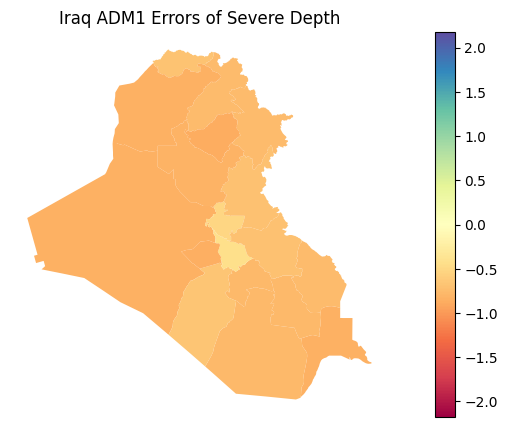

In [70]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot countries with ADM1 error poverty estimates
merged[merged['countrycode']=='IRQ'].plot(ax=ax, column='depth_sev_error', cmap='Spectral', legend=True, vmin = -depth_sev_err_max, vmax = depth_sev_err_max)

plt.title('Iraq ADM1 Errors of Severe Depth')
plt.axis('off')
plt.show()


In [77]:
sumpoor_max = merged['sumpoor_sev'].max()
sumpoor_max

2.7867687

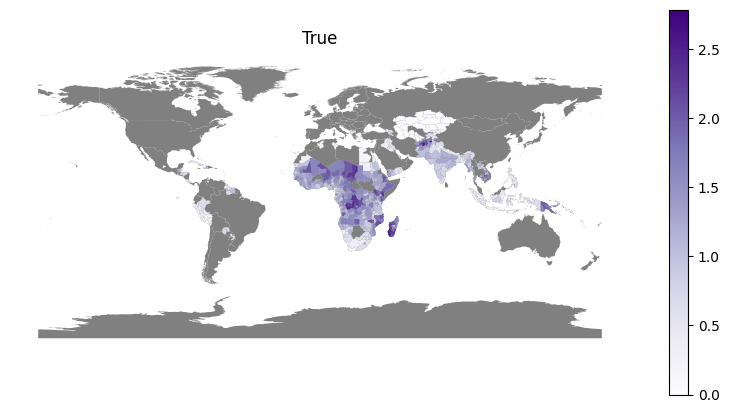

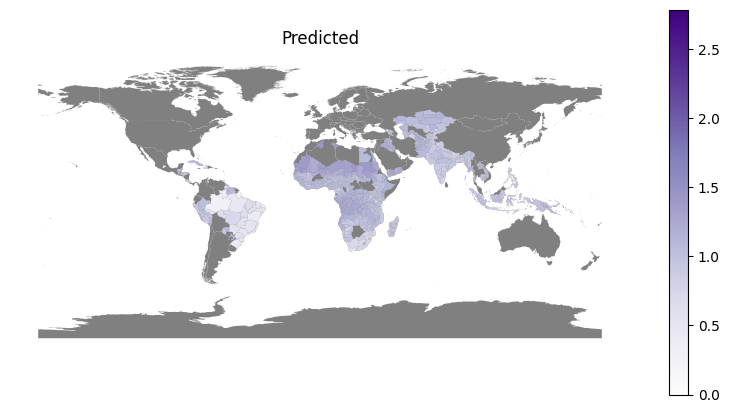

In [78]:
## Predictions vs True

# True
fig, ax = plt.subplots(figsize=(10, 5))
geom_adm0.plot(ax = ax, color='gray')
merged.plot(ax = ax, column='sumpoor_sev', cmap='Purples', legend=True, vmin = 0, vmax = sumpoor_max)
ax.set_title('True')
ax.axis('off')
plt.show()

# Predicted
fig, ax = plt.subplots(figsize=(10, 5))
geom_adm0.plot(ax = ax, color='gray')
merged.plot(ax= ax, column='depth_pred', cmap='Purples', legend=True, vmin = 0, vmax = sumpoor_max)
ax.set_title('Predicted')
ax.axis('off')
plt.show()


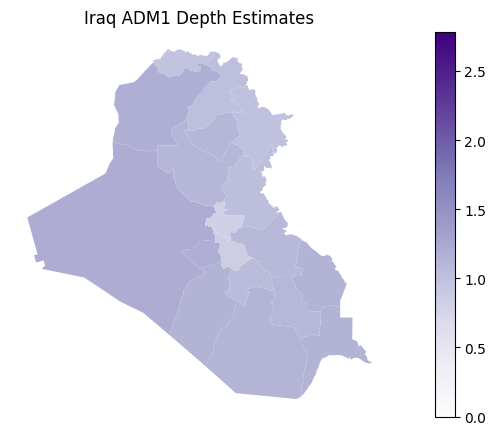

In [79]:
# Predicted
fig, ax = plt.subplots(figsize=(12, 5))

merged[merged['countrycode']=='IRQ'].plot(ax= ax, column='depth_pred', cmap='Purples', legend=True, vmin = 0, vmax = sumpoor_max)
plt.title('Iraq ADM1 Depth Estimates')
ax.axis('off')
plt.show()

In [80]:
irq_adm2['depth_sev_pred'] = lasso_model.predict(irq_adm2[mosaiks_features])

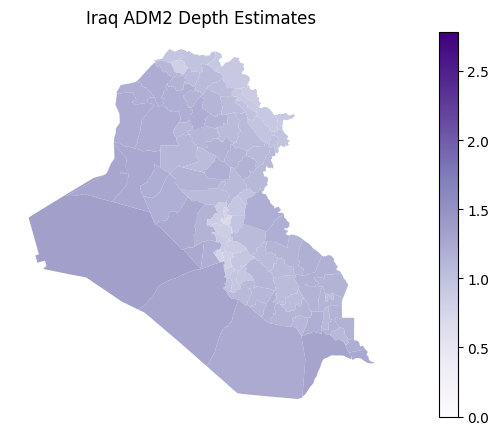

In [81]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot ADM2 prevalence estimate
irq_adm2.plot(ax=ax, column='depth_sev_pred', cmap='Purples', legend=True, vmin = 0, vmax = sumpoor_max)

plt.title('Iraq ADM2 Depth Estimates')
plt.axis('off')
plt.show()


# Falcon

In [108]:
import tqdm as notebook_tqdm

In [110]:
from falcon import AutoML


In [111]:
manager = AutoML(task = 'tabular_regression', train_data = merged, features = mosaiks_features, target = 'deprived_sev_demean', config = 'PlainLearner.hgbt')



Initializing a new TabularTaskManager for task `tabular_regression`
<class 'geopandas.geodataframe.GeoDataFrame'>
Beginning training
Starting cross validation
Fitting the pipeline...
Fitting the pipeline...
Fitting the pipeline...
Fitting the pipeline...
Fitting the pipeline...
Finished cross-validation
Beginning the main training phase
Fitting the pipeline...
Finished training

          N_SAMPLES        R2       RMSE         MSE        MAE     RMSLE  \
train         1006  0.944358   3.614453   13.064273   1.669283  1.284941   
eval_cv       1006  0.151205  14.016614  196.684867  10.534171  2.639672   

            SCORE  SC_SCORE  
train    0.944358  0.972179  
eval_cv  0.151205  0.575603   

Saving the model ...


KeyboardInterrupt: 

In [50]:
# def nearly_identical(geoms, p):
#     nearly = (geoms.intersection(p).area / p.area) > 0.75
#     # return index values where nearly is True
#     return pd.Series(nearly.index[nearly])

